# AOP

> 관점 지향 프로그래밍(Aspect Oriented Programming)
- 애플리케이션 로직에는 핵심 기능과 부가 기능이 존재한다.
  - 핵심 기능: 객체가 제공하는 고유의 기능
  - 부가 기능: 핵심 기능을 보조하기 위한 기능
    - 시간 측정, 로그 추적, 트랜잭션 관리 등
- OOP에서 모듈화의 핵심 단위는 클래스인 반면, `AOP`에서 모듈화의 단위는 Aspect
- Aspect는 여러 타입과 객체에 거쳐서 사용되는 기능(Cross-Cutting, 트랜잭션 관리 등)의 모듈화
- AOP는 OOP를 대체하는 것이 아닌 보조하는 목적

## 용어

|용어|내용|
|---|-----|
|Target|핵심기능을 담고있는 객체 -> 부가기능을 부여할 대상|
|Aspect|여러 클래스에 공통적으로 적용되는 공통 관심 사항(AOP의 기본 모듈)<br>Advice+Point Cut|
|Join Point|Advice가 적용될 수 있는 위치 (메서드 실행, 생성자 호출 등)<br>Spring AOP에서는 메서드 실행 지점으로 제한|
|Point Cut|Join Point 중에서 Advice를 적용하기 위한 조건 서술<br>Aspect는 지정한 Point Cut에 일치하는 모든 Join Point에서 실행|
|Advice|부가 기능, 특정 Join Point에서 취해지는 행동<br>Around, Before, After 등의 타입이 존재|
|Weaving|Point Cut으로 결정한 Target의 Join Point에 Advice를 적용하는 것<br>컴파일 시점, 클래스 로딩 시점, 런타임 시점에서 수행 가능하나 Spring AOP는 런타임에 수행|
|AOP Proxy|AOP를 구현하기 위해 AOP Framework에 의해 생성된 객체<br>Spring AOP는 JDK dynamic proxy 또는 CGLIB proxy 사용|

### Point Cut 표현식    

`excution([접근제어자] 반환타입 [선언타입] 메서드 명(파라미터))`
- `[]`는 옵션 사항
- `*` 사용 가능
  - `*(..)`
    - `*`: 모든 메서드
    - `(..)`: `파라미터`가 0개, 1개, 2개든 관계없이 전부 포함

|Point Cut|Join Point|
|---|----|
|`execution(* *(..))`|모든 메서드 실행 시(모든 파라미터 포함)|
|`execution(* remove(..))`|remove 메서드 실행 시|
|`execution(* set*(..))`|메서드 명이 `set`으로 시작하는 모든 메서드 실행 시|
|`execution(* com.ssafy.aop.*.*(..))`|com.ssafy.aop 패키지의 모든 메서드 실행 시|
|`execution(* com.ssafy.aop..*.*(..))`|com.ssafy.aop 패키지 및 하위 패키지의 모든 메서드 실행 시|
|`execution(* *(String))`|파라미터가 String인 메서드 실행 시|
|`execution(* *())`|파라미터가 없는 메서드 실행 시|
|`execution(* *(*))`|파라미터가 정확히 하나인 메서드 실행 시(모든 타입 허용)|
|`execution(* *(String, ..))`|파라미터가 String으로 시작하는 모든 메서드 실행 시|

## Spring AOP

### Proxy

> 대리인  
> 프록시 서버는 클라이언트가 자신을 통해서 다른 네트워크 서비스에 간접적으로 접속할 수 있게 해주는 컴퓨터 시스템이나 응용프로그램을 말한다.
- 접근 제어와 부가 기능 추가를 수행할 수 있다.
- 프록시 객체는 AOP가 만들어주고, 직접 작성할 필요는 없다.

### Advice Type

|type||
|---|---|
|before|target 메서드 호출 이전|
|after|target 메서드 호출 이후, java exception 문장의 finally와 같이 동작|
|after returning|target 메서드 정상 동작 후|
|after throwing|target 메서드 에러 발생 후|
|around|target 메서드의 실행 시기, 방법, 실행 여부를 결정|

### AOP Proxy

실제 기능이 구현된 `Target` 객체를 호출하면, target이 호출되는 것이 아니라 `advice`가 적용된 `Proxy 객체`가 호출된다.
- Spring AOP는 기본값으로 표준 JDK dynamic proxy 사용
- 인터페이스를 구현한 클래스가 아닌 경우 CGLIB 프록시를 사용

### Spring AOP 시작하기

1. [Maven Repository](https://mvnrepository.com/artifact/org.springframework/spring-context/6.2.0)
에서 `Spring context` 가져오기
- `Spring context`안에 이미 `AOP`가 들어있다.
  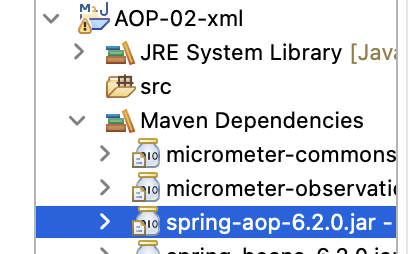

2. [Maven Repository](https://mvnrepository.com/artifact/org.aspectj/aspectjweaver/1.9.22.1)에서 `AspectJ Weaver` 가져오기
- `<scope>runtime</scope>`으로 설정이 되어있는데 컴파일에서도 활용하기 위해 이 라인을 지워준다.

3. [Maven Repository](https://mvnrepository.com/artifact/org.aspectj/aspectjrt/1.9.22.1)에서 `AspectJ Runtime` 가져오기
- 똑같이 `scope`라인은 삭제

```xml
  <dependencies>
    <dependency>
	    <groupId>org.springframework</groupId>
	    <artifactId>spring-context</artifactId>
	    <version>6.2.0</version>
	</dependency>
	<dependency>
	    <groupId>org.aspectj</groupId>
	    <artifactId>aspectjweaver</artifactId>
	    <version>1.9.22.1</version>
	</dependency>
	<dependency>
	    <groupId>org.aspectj</groupId>
	    <artifactId>aspectjrt</artifactId>
	    <version>1.9.22.1</version>
	</dependency>
  </dependencies>
  ```

4. `Project`-`Configure`-`Convert to Maven Project`
5. `New`-`Source Folder`-`resoureces` 폴더 생성 후 `applicationContext.xml` 생성
6. [Spring.io](https://docs.spring.io/spring-framework/reference/core/appendix/xsd-schemas.html#xsd-schemas-aop)에서 `XML Schemas`-`aop Schema`, `context Schema` 복사
- `DI`에서 했던 과정 + `aop`만 새로 추가

#### XML로 만들기

- `Person`
  ```java
    public interface Person {
	    int coding() throws OuchException;
    }
  ```
- `OuchException`
  ```java
    public class OuchException extends RuntimeException {
	    private static final long serialVersionUID = 1L; // 직렬화. 안해도 됨
        public void handleException() {
            System.out.println("go hospital..");
        }

    }
  ```
- `Programmer`
  ```java
    import java.util.Random;
    public class Programmer implements Person {
        public int coding() {
            System.out.println("coding..");
            
            if (new Random().nextBoolean()) {
                throw new OuchException();
            }
            
            return (int) (Math.random() * 100) + 1;
        }

    }
  ```
- `Ssafy`
  ```java
    import java.util.Random;
    public class Ssafy implements Person {
        public int coding() {
            System.out.println("studying..");
            
            if (new Random().nextBoolean()) {
                throw new OuchException();
            }
            
            return (int) (Math.random() * 100) + 1;
        }

    }
```




- `MyAspect`
```java
package com.ssafy.aop;

// 공통 관심사항을 한번에 저장할 클래스 
public class MyAspect {
	
	public void before() {
		System.out.println("Start computer");
	}
	
	public void afterReturning(int num) {
		System.out.println("git commit -m\"" + num +"times\"");
	}
	
	public void afterThrowing(Throwable th) {
		System.out.println("조퇴");
		if (th instanceof OuchException) {
			((OuchException) th).handleException();
		}
	}
	
	public void after() {
		System.out.println("go bed");
	}
}
```

- `applicationContext.xml`의 `<beans>` 내부에 `<aop:config>`작성
  ```xml
    <aop:config>
            <aop:pointcut expression="execution(* *(..))" id="mypt"/>
            <aop:aspect ref="myAspect">
                <aop:before method="before" pointcut-ref="mypt"/>
                <aop:after-returning method="afterReturning" pointcut-ref="mypt" returning="num"/>
                <aop:after-throwing method="afterThrowing" pointcut-ref="mypt" throwing="th"/>
                <aop:after method="after" pointcut-ref="mypt"/>
            </aop:aspect>
        </aop:config>
  ```

- `Test`
  ```java
  public class Test {

	public static void main(String[] args) {
		ApplicationContext context = new GenericXmlApplicationContext("applicationContext.xml");
		Person p = context.getBean("programmer", Person.class);
		
		try {
			p.coding();
			
		} catch (Exception e) {
			
		}

	}

  }
  ```
  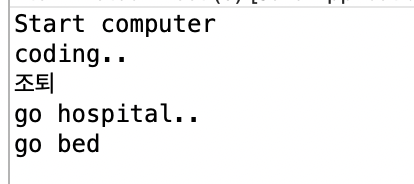

  - `Proxy` 객체를 만들지 않았지만 `Proxy` 객체가 실행됨

#### `around`로 작성하는 법
- `MyAspect`
  ```java
    public void around(ProceedingJoinPoint pjt) {
            int num = 0;
            this.before();
            try {
                num = (int) pjt.proceed();
                this.afterReturning(num);
            } catch (Throwable e) {
                this.afterThrowing(e);
            } finally {
                this.after();
            }
            
            
        }
  ```
- `applicationContext`
  ```xml
  <aop:config>
		<aop:pointcut expression="execution(* *(..))" id="mypt"></aop:pointcut>
		<aop:aspect ref="myAspect">
			<aop:around method="around" pointcut-ref="mypt"></aop:around>
		</aop:aspect>
	</aop:config>
  ```

#### Annotation으로 만들기

```java
package com.ssafy.aop;

import org.aspectj.lang.ProceedingJoinPoint;
import org.aspectj.lang.annotation.After;
import org.aspectj.lang.annotation.AfterReturning;
import org.aspectj.lang.annotation.AfterThrowing;
import org.aspectj.lang.annotation.Aspect;
import org.aspectj.lang.annotation.Before;
import org.aspectj.lang.annotation.Pointcut;
import org.springframework.stereotype.Component;

@Component
@Aspect
// 공통 관심사항을 한번에 저장할 클래스 
public class MyAspect {
	@Pointcut("execution(* com.ssafy.aop.*.coding())")
	public void mypt() { // 메서드명이 id가 됨
		
	}
	
	
	@Before("mypt()")
	public void before() {
		System.out.println("Start computer");
	}
	
	@AfterReturning(value="mypt()", returning="num")
	public void afterReturning(int num) {
		System.out.println("git commit -m\"" + num +"times\"");
	}
	
	@AfterThrowing(value="mypt()", throwing = "th")
	public void afterThrowing(Throwable th) {
		System.out.println("조퇴");
		if (th instanceof OuchException) {
			((OuchException) th).handleException();
		}
	}
	
	@After("mypt()")
	public void after() {
		System.out.println("go bed");
	}
```

```xml
<aop:aspectj-autoproxy/>
	<context:component-scan base-package="com.ssafy.aop"></context:component-scan>
```
- x 표시가 나는데 그냥 무시해도 된다.